
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>

---
---

# Análisis Estadístico de Datos - 2023

* **Profesor**: Diego Ravignani Guerrero
* **Prácticas**: Carmina Perez Bertolli



---
---
## Trabajo Práctico 6 - Test de Hipótesis
---
---

La diabetes se diagnostica en base al nivel de glucosa en sangre. Según la base de datos de indios Pima la glucosa en sangre de personas sanas tiene una media $\mu_0 = 110.6\:mg/dl$ y una desviación estándar $\sigma_0 = 24.8\:mg/dl$. Para personas con diabetes la media es $\mu_1 = 142.3\:mg/dl$ y la desviación estándar $\sigma_1 = 29.6\:mg/dl$. Asumir que la glucosa en sangre para personas sanas y con diabetes sigue una distribución normal. Siguiendo las recomendaciones de la Organización Mundial de la Salud, a una persona se le diagnostica diabetes si su nivel de glucosa en sangre excede $126\:mg/dl$. Graficar las distribuciones de la glucosa en sangre para las hipótesis nula y alternativa. Indicar en la figura el valor crítico de la glucosa en sangre.

  Calcular la precisión del test de glucosa en sangre, la probabilidad que
un paciente sano sea diagnosticado como diabético (falso positivo) y la
probabilidad que un paciente diabético sea diagnosticado como sano (falso negativo). Si la prevalencia de la diabetes es del $35\%$, calcular
aplicando el teorema de Bayes, la probabilidad que una persona con
un test positivo efectivamente tenga diabetes.

---
### **Resolución**

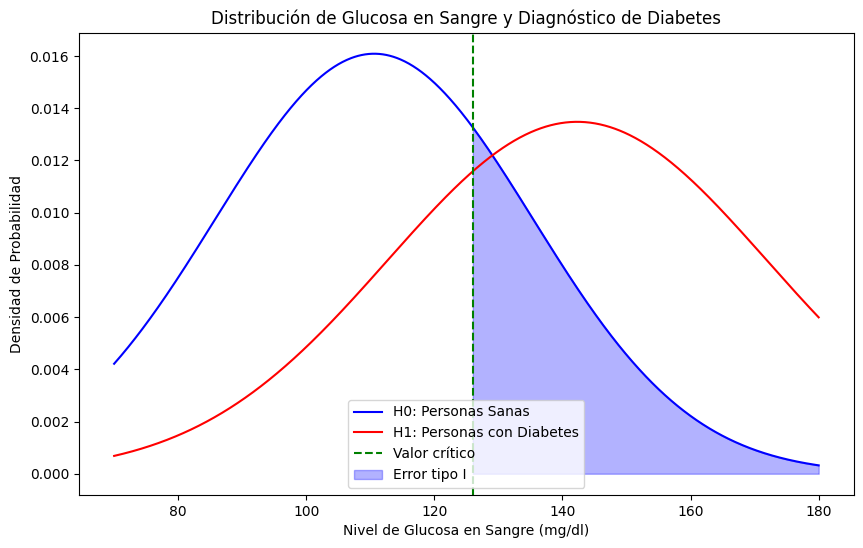

Precisión del test: 72.44%
Probabilidad de falso positivo: 26.73%
Probabilidad de falso negativo: 29.09%
Probabilidad condicional de tener diabetes dado un resultado positivo (VPP): 58.82%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros para personas sanas (hipótesis nula)
mu_0 = 110.6
sigma_0 = 24.8

# Parámetros para personas con diabetes (hipótesis alternativa)
mu_1 = 142.3
sigma_1 = 29.6

# Valor crítico para el diagnóstico de diabetes según la OMS
cutoff = 126

# Rango para la gráfica
x = np.linspace(70, 180, 1000)

# Distribuciones normales
pdf_0 = norm.pdf(x, mu_0, sigma_0)
pdf_1 = norm.pdf(x, mu_1, sigma_1)

# Gráfica de las distribuciones
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_0, label='H0: Personas Sanas', color='blue')
plt.plot(x, pdf_1, label='H1: Personas con Diabetes', color='red')

# Línea vertical para el valor crítico
plt.axvline(x=cutoff, color='green', linestyle='--', label='Valor crítico')

# Área sombreada para el error tipo I
x_fill = np.linspace(cutoff, 180, 1000)
plt.fill_between(x_fill, norm.pdf(x_fill, mu_0, sigma_0), color='blue', alpha=0.3, label='Error tipo I')

plt.title('Distribución de Glucosa en Sangre y Diagnóstico de Diabetes')
plt.xlabel('Nivel de Glucosa en Sangre (mg/dl)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

# Prevalencia de la diabetes
prevalencia_diabetes = 0.35

# Probabilidad de tener diabetes (prior)
P_diabetes = prevalencia_diabetes

# Probabilidad de no tener diabetes (prior complementaria)
P_no_diabetes = 1 - P_diabetes

# Sensibilidad del test (probabilidad de verdadero positivo)
sensibilidad = 1 - norm.cdf(cutoff, mu_1, sigma_1)

# Especificidad del test (probabilidad de verdadero negativo)
especificidad = norm.cdf(cutoff, mu_0, sigma_0)

# Precisión del test (proporción de verdaderos positivos y verdaderos negativos)
precision = (P_diabetes * sensibilidad + P_no_diabetes * especificidad)

# Probabilidad de falso positivo
falso_positivo = 1 - especificidad

# Probabilidad de falso negativo
falso_negativo = 1 - sensibilidad

# Probabilidad de obtener un resultado positivo (regla de probabilidad total)
P_positivo = P_diabetes * sensibilidad + P_no_diabetes * (1 - especificidad)

# Probabilidad condicional de tener diabetes dado un resultado positivo (Valor Predictivo Positivo - VPP)
VPP = (P_diabetes * sensibilidad) / P_positivo

print(f'Precisión del test: {precision:.2%}')
print(f'Probabilidad de falso positivo: {falso_positivo:.2%}')
print(f'Probabilidad de falso negativo: {falso_negativo:.2%}')
print(f'Probabilidad condicional de tener diabetes dado un resultado positivo (VPP): {VPP:.2%}')
